In [ ]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels. stats.multicomp import pairwise_tukeyhsd # тест Тьюки , который позволяет нам проводить попарные сравнения между средними значениями каждой группы.
import statsmodels

**ЗАДАНИЕ_1**

Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.

In [ ]:
# Для проверки нормальности распределения выборки данных использую тест Шапиро–Уилка

In [ ]:
data_ = np.round(74 + 6 * np.random.standard_normal(14),1) # для проверки функции

In [ ]:
def shapiro(data, a=0.05):
  stat, p = scipy.stats.shapiro(data)
  if p > a:
    return f"Нулевую гипотизу не отклоняем. Распределение вероятно нормальное! т.к p-value = {p:.5f}"
  return f"Подтверждаем альтернативную гипотизу. Распределение вероятно не нормальное т.к p-value = {p:.5f}"

In [ ]:
shapiro(data_, 0.01)

'Нулевую гипотизу не отклоняем. Распределение вероятно нормальное! т.к p-value = 0.57163'

**ЗАДАНИЕ_2**

Даны две выборки роста мужчин и женщин.
Докажите, используя t-Тест Стьдента, что различие между выборками незначительно, если уровень значимости равен
α
= 0.001.
Покажите различия визуально
Является ли результат полезным с практической точки зрения? Почему да или нет?

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = scipy.stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = scipy.stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

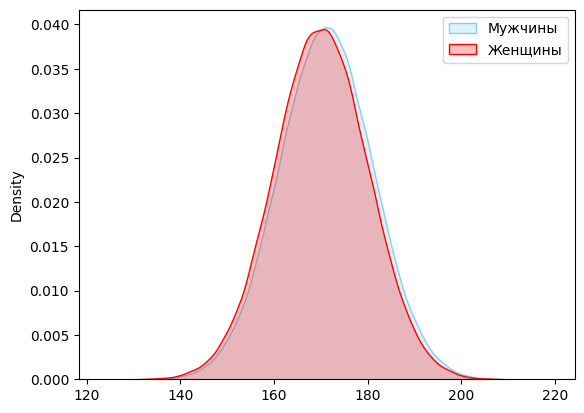

In [ ]:
sns.kdeplot(mens, label='Мужчины', fill=True, color='skyblue')
sns.kdeplot(womens, label='Женщины', fill=True, color='red')
plt.legend()
plt.show()

In [ ]:
# Праверка что распределение нормальное
print(shapiro(womens, 0.01))
print(shapiro(mens, 0.01))

Нулевую гипотизу не отклоняем. Распределение вероятно нормальное! т.к p-value = 0.83966
Нулевую гипотизу не отклоняем. Распределение вероятно нормальное! т.к p-value = 1.00000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
def levene(data_1, data_2, data_3=[], a=0.05):
  stat, p = scipy.stats.levene(data_1, data_2)
  if p > a:
    return f"Нулевую гипотизу не отклоняем. Вариация в группах одинаковое! т.к p-value = {p:.5f}"
  return f"Подтверждаем альтернативную гипотизу. Вариация в группах различается т.к p-value = {p:.5f}"

In [ ]:
# Проверка что дисперсия выборок не отличаются
levene(mens, womens)

'Нулевую гипотизу не отклоняем. Вариация в группах одинаковое! т.к p-value = 0.68043'

In [ ]:
def Student(data_1, data_2, a=0.05):
  stat, p = scipy.stats.ttest_ind(data_1, data_2)
  if p > a:
    return f"Нулевую гипотизу не отклоняем - H0. Выборки не имеют стат. значимых различий т.к p-value = {p:.5f}"
  return f"Подтверждаем альтернативную гипотизу- H1. выборки Выборки имеют стат. значимые различия  т.к p-value = {p:.5f}"

In [ ]:
Student(mens, womens, 0.001)

'Подтверждаем альтернативную гипотизу- H1. выборки Выборки имеют стат. значимые различия  т.к p-value = 0.00000'

*ВЫВОД*

При таком большом объеме выборки - 150 000 тест становится очень чувствительным и с практической точки зрения бесполезным. При таких объёмах выборок  p-value стремется к нулю!
Даже если выборка 1500, то p-value = 0.00020


**ЗАДАНИЕ_3**

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [ ]:
shapiro(test_team)

'Подтверждаем альтернативную гипотизу. Распределение вероятно не нормальное т.к p-value = 0.00462'

In [ ]:
shapiro(developer_team)

'Подтверждаем альтернативную гипотизу. Распределение вероятно не нормальное т.к p-value = 0.00049'

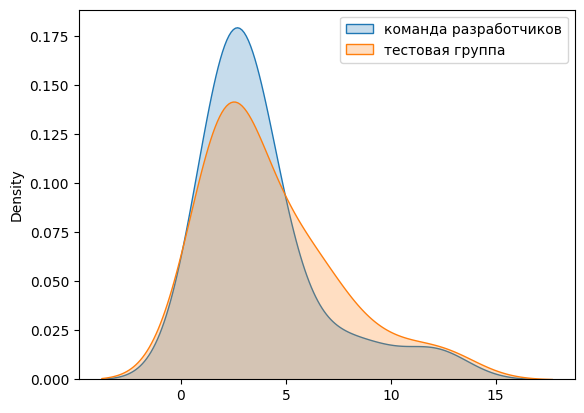

In [ ]:
sns.kdeplot(developer_team, label='команда разработчиков', fill=True)
sns.kdeplot(test_team, label='тестовая группа', fill=True)
plt.legend()
plt.show()

In [ ]:
def mannwhitneyu(data_1, data_2, a=0.05):
  stat, p = scipy.stats.mannwhitneyu(data_1, data_2)
  if p > a:
    return f"Нулевую гипотизу не отклоняем - H0. Выборки не имеют стат. значимых различий т.к p-value = {p:.5f}"
  return f"Подтверждаем альтернативную гипотизу- H1. выборки Выборки имеют стат. значимые различия  т.к p-value = {p:.5f}"

In [ ]:
print('Разницы НЕТ между переутомлением двух команд')
mannwhitneyu(test_team, developer_team)

Разницы НЕТ между переутомлением двух команд


'Нулевую гипотизу не отклоняем - H0. Выборки не имеют стат. значимых различий т.к p-value = 0.82265'

**ЗАДАНИЕ_4**

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.
В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.


In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [ ]:
df_only_breast = pd.DataFrame({'only_breast': only_breast})
df_only_formula = pd.DataFrame({'only_formula': only_formula})
df_both = pd.DataFrame({'both': both})
df_full = pd.concat([df_only_breast, df_only_formula, df_both], axis=1)

In [ ]:
df_full.head()

,only_breast,only_formula,both
0,794.1,898.8,976.4
1,716.9,881.2,656.4
2,993.0,940.2,861.2
3,724.7,966.2,706.8
4,760.9,957.5,718.5


In [ ]:
""" pandas.melt().
Эта функция полезна для преобразования фрейма данных в формат, в котором один или несколько столбцов являются переменными-идентификаторами (id_vars),
в то время как все остальные столбцы, считаются измеряемыми переменными (value_vars) - "не привязаны" к оси строк,
оставляя только два столбца без идентификаторов, ‘variable’ и ‘value’.
id_vars=None - столбцы, которые будут использоваться в качестве переменных-идентификаторов.
value_vars=None - столбцы, которые нужно отключить. Если не указано, то будут использоваться все столбцы, которые не заданы как id_vars.
var_name=None - имя, используемое для столбца ‘variable’. Если его нет, то используется frame.columns.name или ‘variable’.
value_name='value' - имя, которое будет использоваться для столбца ‘value’.
col_level=None - используйте этот уровень, если столбцы являются MultiIndex.
ignore_index=True - если True, то исходный индекс игнорируется. Если False, исходный индекс сохраняется. Метки индексов будут повторяться по мере необходимости."""

In [ ]:
df_melt = pd.melt(df_full.reset_index(), id_vars=['index'], value_vars=['only_breast', 'only_formula', 'both'])
df_melt.head()

,index,variable,value
0,0,only_breast,794.1
1,1,only_breast,716.9
2,2,only_breast,993.0
3,3,only_breast,724.7
4,4,only_breast,760.9


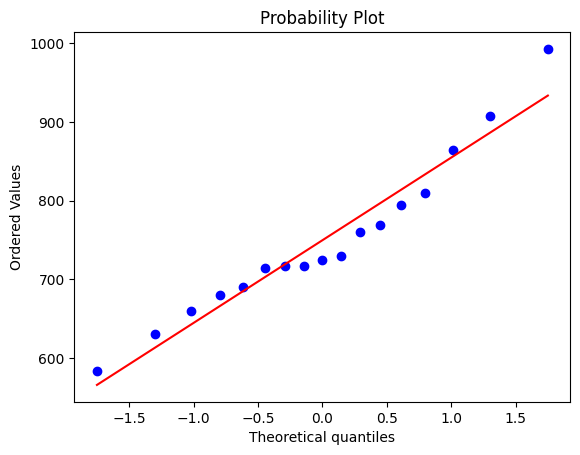

In [ ]:
res_1 = scipy.stats.probplot(only_breast, plot=plt)

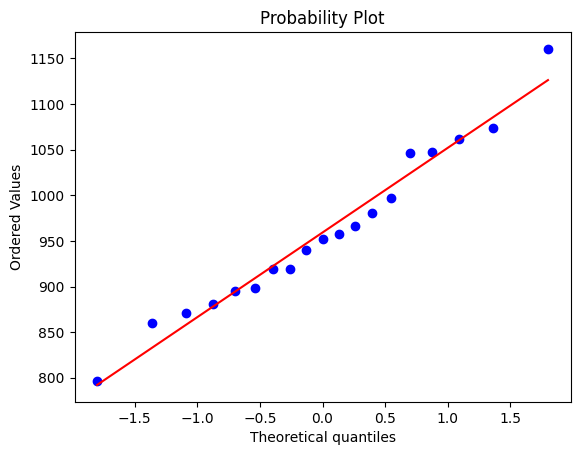

In [ ]:
res_1 = scipy.stats.probplot(only_formula, plot=plt)

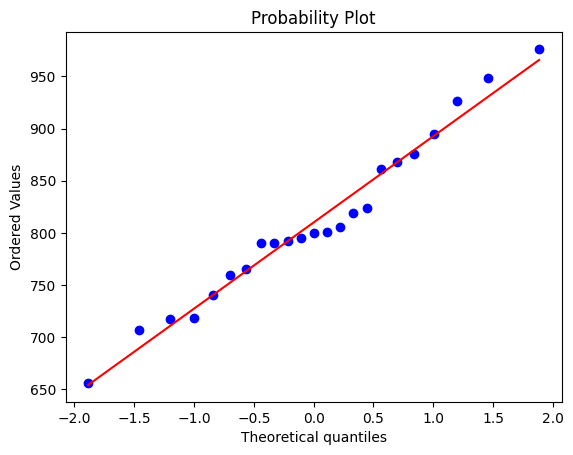

In [ ]:
res_1 = scipy.stats.probplot(both, plot=plt)

In [ ]:
levene(only_breast,	only_formula,	both, 0.01)

'Нулевую гипотизу не отклоняем. Вариация в группах одинаковое! т.к p-value = 0.85828'

In [ ]:
# Однофакторный дисперсионный анализ:

def f_oneway_(data_1, data_2, data_3=[], a=0.05):
  f_value, p_val = scipy.stats.f_oneway(data_1, data_2, data_3)
  if p_val > a:
    return f"Нулевую гипотизу не отклоняем - H0. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, одинаковые. т.к p-value = {p_val:.10f}. Статистика = {f_value:.5f}"
  return f"Подтверждаем альтернативную гипотизу- H1. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, различаются. т.к p-value = {p_val:.10f}. Статистика = {f_value:.5f}"

In [ ]:
f_oneway_(only_breast,	only_formula,	both)


'Подтверждаем альтернативную гипотизу- H1. СРЕДНЕЕ ЗНАЧЕНИЕ, вероятно, различаются. т.к p-value = 0.0000000072. Статистика = 26.70125'

**Таким образом при разных видах вскармливании разница ЕСТЬ между среднемесячным приростом у новорожденных!**

In [ ]:
# Множественное сравнение - кретерии Тьюки

In [ ]:
# ВАРИАНТ_1

import statsmodels.stats.multicomp as mc

groups = ['only_breast','only_formula','both']
lngth = [len(only_breast), len(only_formula), len(both)]
# Create a list of group labels for each data point
group_labels = []
for i, group in enumerate(groups):
    group_labels.extend([group] * lngth[i])

# Perform Tukey's HSD post-hoc test
tukey = mc.pairwise_tukeyhsd(endog= only_breast + only_formula + both,
                          groups=group_labels, # Use the list of group labels
                          alpha=0.05)
print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       both  only_breast -60.1286 0.0995 -129.1485   8.8912  False
       both only_formula 149.2636    0.0   82.3651 216.1621   True
only_breast only_formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


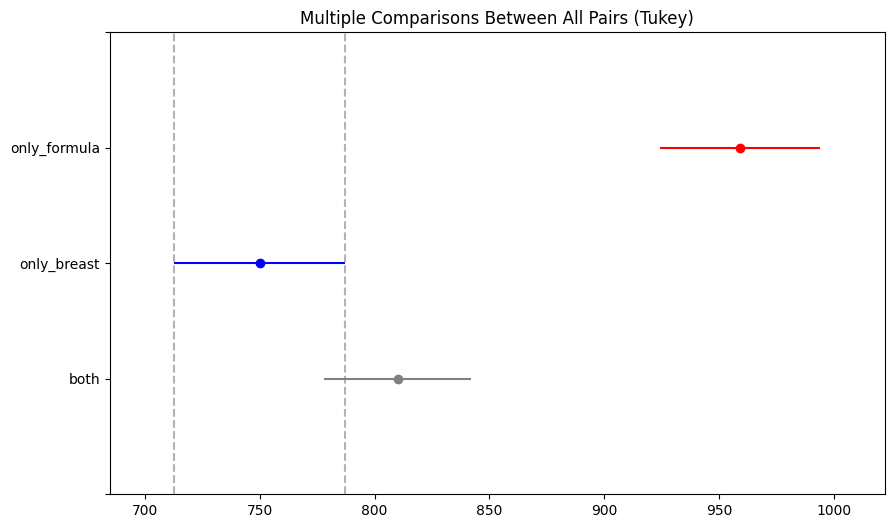

In [ ]:
tukey.plot_simultaneous(comparison_name="only_breast");

ВЫВОД: При искусственном и  смешанном вскармливании среднии отличаются + при искуственном и грудном вскармливании среднии так же отличаются. В обоих случаях в сторону увеличения веса новорождённого при искуственном вскармливании.

**При смешанном и грудном вскармливании среднии статистически не отличаются.**

In [ ]:
# ВАРИАНТ_2
df_melt.head()

,index,variable,value
0,0,only_breast,794.1
1,1,only_breast,716.9
2,2,only_breast,993.0
3,3,only_breast,724.7
4,4,only_breast,760.9


In [ ]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     69 non-null     int64  
 1   variable  69 non-null     object 
 2   value     59 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


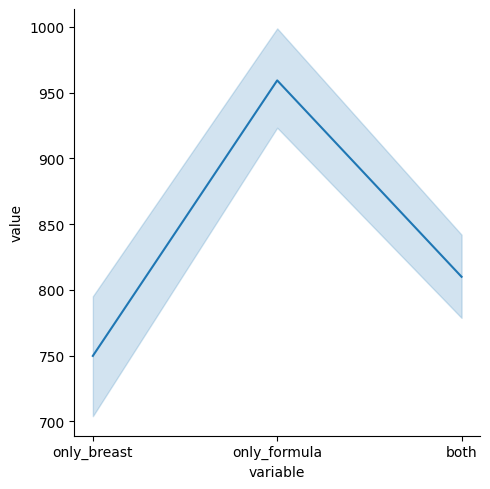

In [ ]:
sns.relplot(data=df_melt, x=df_melt['variable'], y=df_melt['value'], kind = "line");

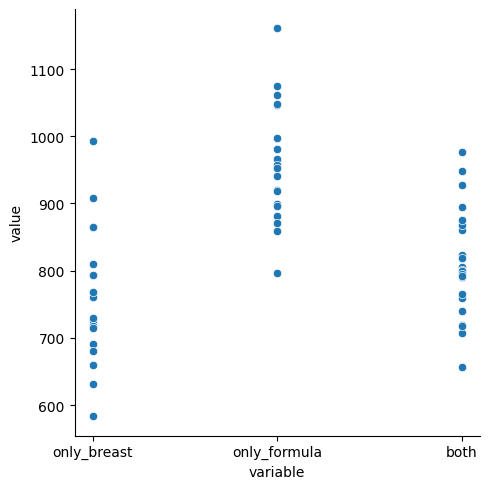

In [ ]:
sns.relplot(data=df_melt, x=df_melt['variable'], y=df_melt['value']);

In [ ]:
import statsmodels.stats.multicomp as mc
tukey = mc.pairwise_tukeyhsd(endog=df_melt['value'].values,
                          groups=df_melt['variable'],
                          alpha=0.05)

10
value
<class 'float'>    69
Name: count, dtype: int64
Group 'only_breast' Нулевой дисперсии нет
Group 'only_formula' Нулевой дисперсии нет
Group 'both' Нулевой дисперсии нет


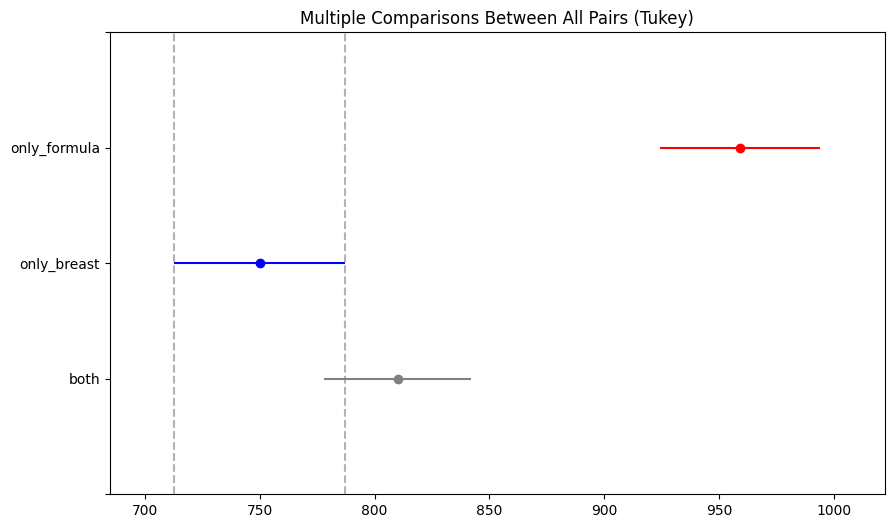

In [ ]:
# ОБРАБОТКА ДАТАФРЕЙМА ПЕРЕД ТЕСТОМ ТЬЮКИ!!!!

import statsmodels.stats.multicomp as mc
import numpy as np

# пропущенные значения в столбце "значение"
print(df_melt['value'].isnull().sum())

# Наличие нечисловых значений в столбце "значение" (ЕСТЬ, но это название столбца)
print(df_melt['value'].apply(type).value_counts())

# Проверка наличие групп с нулевой дисперсией
for group in df_melt['variable'].unique():
    group_values = df_melt[df_melt['variable'] == group]['value']
    if np.var(group_values) == 0:
        print(f"Group '{group}' has zero variance.")
    else:
        print(f"Group '{group}' Нулевой дисперсии нет")
# Рассмотрите возможность удаления пропущенных значений или их условного вычисления перед выполнением теста HSD Tukey
df_melt_cleaned = df_melt.dropna(subset=['value'])  # Удаление строк с отсутствующим значением 'value'

# Perform Tukey's HSD test on the cleaned data
tukey = mc.pairwise_tukeyhsd(endog=df_melt_cleaned['value'].values,
                          groups=df_melt_cleaned['variable'],
                          alpha=0.05)

# Plot the results
tukey.plot_simultaneous(comparison_name="only_breast");

In [ ]:
#Тест Краскела-Уоллиса
stat, p = scipy.stats.kruskal(only_breast, only_formula, both)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 28.405, p = 0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются
